## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Movie Analysis for future Movie Production

## Overview

This project analyzes movie characteristics such as genres, return on investment (ROI), and ratings. The data analysis performed in this repository is based on datasets from [Box Office Mojo](https://www.boxofficemojo.com/), [IMDB](https://www.imdb.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), [TheMovieDB](https://www.themoviedb.org/), and [The Numbers](https://www.the-numbers.com/).  

## Buisness Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

> ### Buisness Understanding 
> Microsoft wants to enter the movie production business however as a rookie in this business they need insight on audience opinions about characteristics about movies. Audience opinions impact ROI. In addition to learning about what an audience enjoys, Microsoft must also consider when to release their movies to get the most ROI. 

## Data Understanding

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import requests
import json 
import zipfile
import key 
import calendar 
import ast

### Box Office Mojo
The dataset in correspondance to the Box Office Mojo in the zipped Data folder is titled "*bom.movie_gross.csv.gz*". To explore this files contents Pandas can be used for exploratory analysis. 

In [2]:
# Read the file
bom_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### IMDB 
The dataset in correspondance to IMDB in the zipped Data folder is a database titled "*im.db.zip*". To deal with this dataset SQLite3 in addtion to Pandas must be used for exploratory analysis. The main tables of interest in this database are the movie_basics and movie_ratings tables. These tables contain movie charactertics and measureables for analysis. 

### Rotten Tomatoes
The datasets in correspondance to Rotten Tomatoes in the zipped Data foler are "*rt.movie_info.tsv.gz*" and "*rt.reviews.tsv.gz*". Both files are Table Seperated Value files meaning a delimeter needs to be used to read the files using Pandas. We must also merge both datasets based on their 'id' column in order to explore the full contents of Rotten Tomatoes overall. The id referes to the review of the movie it was conducted on.  

In [3]:
# Read the files
rt_movie_info_df = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter='\t')
rt_reviews_df = pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter='\t', encoding='latin1')

In [4]:
# Create a merged df based on movie id
merged_rt_df = rt_movie_info_df.merge(rt_reviews_df, on='id')
merged_rt_df.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


### TMDB
The dataset in correspondance to TMDB in the zipped Date folder is "*tmdb.movies.csv.gz*". To explore this files contents Pandas can be used for exploratory analysis. The id columns titled 'genre_ids' and 'id' are genere names and the movie name identifications. The main identification that is needed for analysis are the genre_ids. The movie name is not needed for analysis but rather the movie characteristics such as genres.

In [5]:
# Read the file 
tmdb_df = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Data Preparation

### Data Cleaning 

#### Box Office Mojo 
To be explianed

#### IMDB
To be explained

#### Rotten Tomatoes
To be explained

#### TMDB
To be explained 

In [6]:
# Retreive genre id's using an API from TMDB that contains the definitions for the id numbers
url = "https://api.themoviedb.org/3/genre/movie/list?language=en"
key = key.api_key

headers = {
    "Authorization": f"Bearer {key}",
    "accept": "application/json"
}

response = requests.get(url, headers=headers)
print(response.text)

{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}


In [7]:
# Make our genre dictionary workasble with pandas by converting to JSON format
genre_dict = response.json()

# Make a KeyValue dictionary from our response
genre_mapping = {}
for genre in genre_dict['genres']:
    genre_mapping[genre['id']] = genre['name']

# make a function to map genre IDs to genre names
def map_genres(genre_ids):
    return [genre_mapping.get(genre_id) for genre_id in genre_ids if genre_mapping.get(genre_id)]

In [8]:
# Define a function to parse our string in our genres column since its a single string and not a list
# the literal_eval method can safely evaluate strings containing Python values from unknown sources without us having to parse the values ourselves
def parse_list_string(s):
    try:
        return ast.literal_eval(s)
    except (SyntaxError, ValueError):
        return []

# Convert the genre_ids column from string representation to list
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(parse_list_string)

# Update the genre_ids column with the corresponding genre names
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(lambda ids: [genre_mapping.get(int(id)) for id in ids])

# Print the updated DataFrame
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [11]:
# Clean out our dataframe by dropping unnecessary columns for the analysis
tmdb_drop = tmdb_df.drop(["Unnamed: 0", "id", "original_language"], axis=1, inplace=False)
tmdb_drop.head()

,genre_ids,original_title,popularity,release_date,title,vote_average,vote_count
0,"[Adventure, Fantasy, Family]",Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[Fantasy, Adventure, Animation, Family]",How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[Adventure, Action, Science Fiction]",Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[Animation, Comedy, Family]",Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[Action, Science Fiction, Adventure]",Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
# Check for any Null values
nan_values = tmdb_drop.isnull().sum()
nan_values

genre_ids         0
original_title    0
popularity        0
release_date      0
title             0
vote_average      0
vote_count        0
dtype: int64

In [13]:
# Explode the 'genre_ids' column to convert lists into separate rows
df_exploded = tmdb_drop.explode('genre_ids')

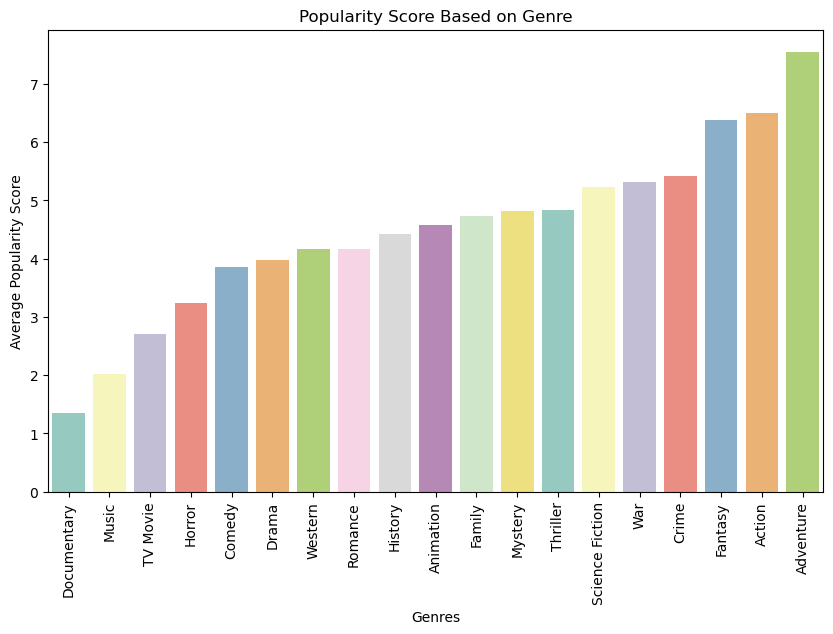

In [14]:

# Convert 'vote_average' column to numeric
df_exploded['popularity'] = pd.to_numeric(df_exploded['popularity'], errors='coerce')

# Group the DataFrame by each genre
genre_groups = df_exploded.groupby('genre_ids')

# Calculate the average popularity for each genre
genre_avg_pop = genre_groups['popularity'].mean().reset_index().sort_values('popularity')

# Plot the bar graph with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_avg_pop, x='genre_ids', y='popularity', palette='Set3')
plt.xlabel('Genres')
plt.ylabel('Average Popularity Score')
plt.title('Popularity Score Based on Genre')
plt.xticks(rotation=90)
plt.show()

## Data Analysis

#### Genre vs Popularity Score 

## Conclusions

In [ ]:
# Your code here - remember to use markdown cells for comments as well!